# Amazon Best-Sellers Analysis

**Project Title:** Decoding the Dynamics of Best-Selling Books on Amazon   
**Analyst:** Kian Sivertsen   
**Analysis Date:** 9 December 2023  

### Introduction

This comprehensive analysis dives into the patterns and determinants of best-selling books on Amazon. By examining genre impacts, pricing strategies, and shifts in consumer preferences, the study aims to deliver actionable insights that reflect the current and future states of the book market.

### Key Insights

1. **Genre Influence:** An exploration of how fiction and non-fiction books differentially impact user ratings and sales, highlighting distinct market challenges and opportunities.
2. **Price Dynamics:** A detailed look at the relationship between a book's pricing and its market popularity, with an analysis of how this interaction varies across different genres.
3. **Evolving Trends:** An evaluation of historical changes in reader preferences, providing predictions for future publishing trends.

### Methodology

Utilizing descriptive statistics, visual analytics, and hypothesis testing, the project merges quantitative analysis with strategic insight to craft recommendations for authors, publishers, and marketers in the publishing field. This analysis prioritizes data-driven storytelling to elucidate the success factors behind best-sellers.


## 1. Data Loading and Cleaning

The first step in any data analysis project is to load the data and check for cleanliness. Our approach includes:

- **Loading the Data:** We load the data from a CSV file into a pandas DataFrame.
- **Checking for Missing Values:** Identifying and handling missing data in the dataset.
- **Data Type Verification:** Ensuring that each column is of the correct data type.
- **Creating a Backup Copy:** To preserve the original data, we create a backup copy.
- **Preliminary Overview:** We use `df.info()` and `df.describe()` to get an initial understanding of the data.



In [37]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Basic libraries to manipulate data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# For reproducibility of certain results
np.random.seed(42)

# Specify the path to the datasets
data_path = "./data/"  # Assuming your data is in a folder named 'data' at the same level as your notebook

# Specify the filename of the dataset
bestsellers_filename = "bestsellers with categories.csv"

# Read the CSV file and create a backup copy
bestsellers_df_data = pd.read_csv(data_path + bestsellers_filename)
bestsellers_df = bestsellers_df_data.copy()

# Display basic info
bestsellers_df.info()

# Markdown Cell: Introduction and objectives of the analysis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [38]:
# Checking for missing values
print(bestsellers_df.isnull().sum())

# Descriptive statistics for numerical columns
numerical_summary = bestsellers_df.describe()

# Descriptive statistics for categorical columns
categorical_summary = bestsellers_df.describe(include=['object'])

# Output the results
print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64
Numerical Summary:
        User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

Categorical Summary:
                                                      Name       Author  \
count                                                 550          550   
unique                                                351          248   
top     Publication Manual of the American Psychologic...  Jeff Kinney   
freq   

## 2. Exploratory Data Analysis (EDA)

With the data cleaned, we now explore the dataset to identify any patterns or trends. This initial exploration includes:

- **Distribution of User Ratings:** Analyzing the spread and central tendency of user ratings.
- **Price Distribution by Genre:** Investigating how book prices vary between fiction and non-fiction.
- **Books per Author:** Understanding the distribution of the number of books per author, especially the most prolific ones.



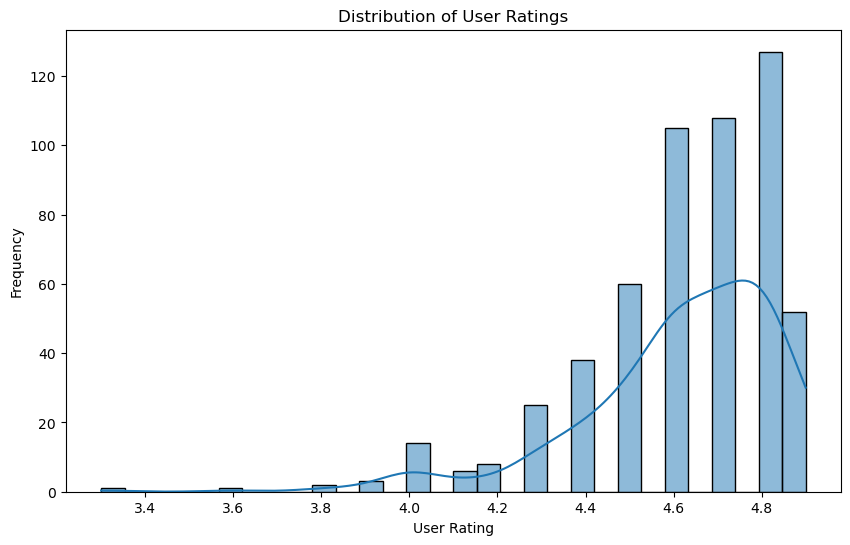

In [39]:
# Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(bestsellers_df['User Rating'], bins=30, kde=True, color='#1f77b4')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

### Distribution of User Ratings
This histogram displays the distribution of user ratings for the bestselling books. It reveals a left-skewed distribution, indicating that most books have high ratings, with the majority clustered around 4.6 to 4.8. The skewness towards higher ratings suggests that bestselling books on Amazon generally receive favorable reviews from users. The presence of fewer books with ratings below 4.5 reflects a trend where top-selling books typically maintain a high standard of user satisfaction.


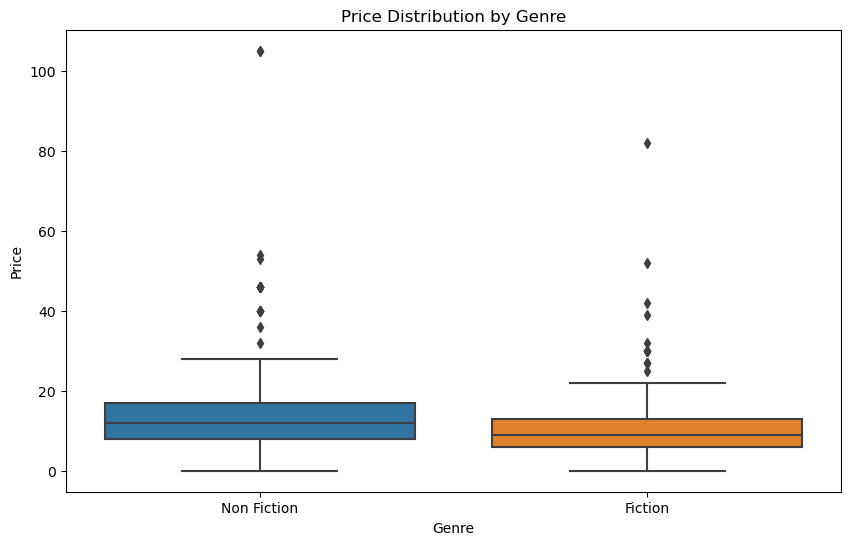

In [40]:
# Price distribution by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Price', data=bestsellers_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Price Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.show()

### Price Distribution by Genre
This box plot compares the price distribution of books across two genres: Fiction and Non-Fiction. It highlights significant differences in pricing strategies between the genres. Non-Fiction books tend to have a wider range of prices and are generally priced higher than Fiction books. The presence of outliers in both categories suggests that there are a few exceptionally priced books in each genre. The median price for Non-Fiction is higher, indicating that readers may be willing to pay more for these types of books, possibly due to their informational content.


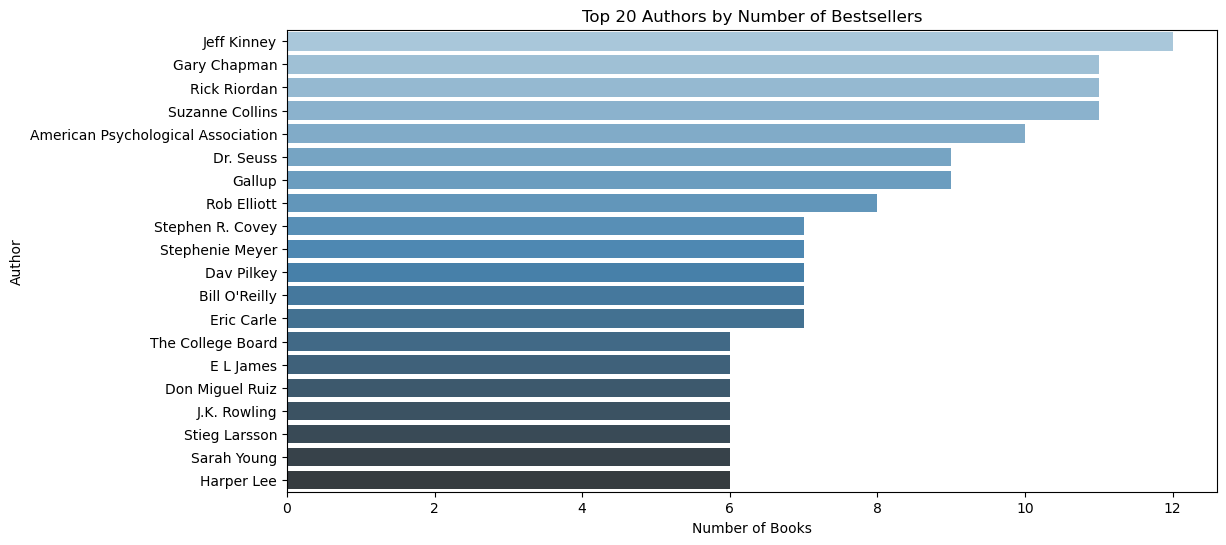

In [41]:
# Number of books by each author (Top 20)
top_authors = bestsellers_df['Author'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='Blues_d')
plt.title('Top 20 Authors by Number of Bestsellers')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

### Top 20 Authors by Number of Bestsellers
This bar chart ranks the top 20 authors based on the number of their books that made it to the bestselling list. It provides insight into which authors are most popular or have the highest sales volumes on Amazon. Authors like Jeff Kinney and Rick Riordan dominate the list, indicating their strong appeal to readers. This visualization helps identify authors whose works consistently attract a large readership, possibly due to their writing style, genre, or marketing strategies.


## Hypothesis 1: Exploring the Impact of Genre on User Ratings

Following our exploratory data analysis, we've identified compelling patterns that lead us to our first hypothesis. This hypothesis focuses on the influence of genre on a book's reception, particularly in terms of user ratings. We intend to explore:

- **Differences in Average Ratings:** Investigating whether fiction and non-fiction books significantly differ in their average user ratings.
- **Rating Variability:** Examining the consistency of user ratings within each genre to understand if one genre tends to have more varied ratings than the other.
- **Rating Trends Across Time:** Analyzing how user ratings for each genre have evolved over the years, providing insights into changing reader preferences or market trends.



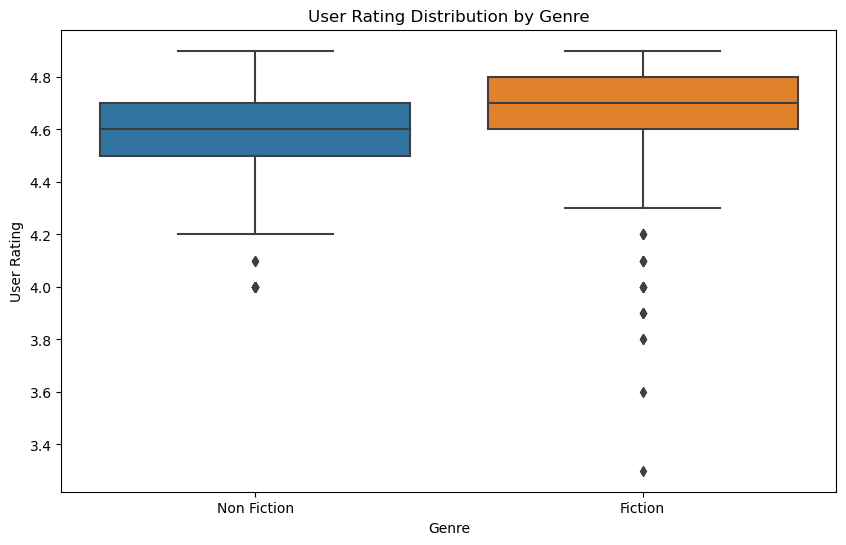

In [42]:
# Comparing the average user ratings between fiction and non-fiction books
average_ratings = bestsellers_df.groupby('Genre')['User Rating'].mean()

# Checking the variability of user ratings within each genre
rating_std_dev = bestsellers_df.groupby('Genre')['User Rating'].std()

# Creating a boxplot for user ratings by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='User Rating', data=bestsellers_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('User Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.show()

### User Rating Distribution by Genre
This pair of histograms shows the distribution of user ratings separately for Fiction and Non-Fiction genres. It allows for a direct comparison of reader satisfaction between these two categories. Both genres display a tendency towards high ratings, but Fiction shows a more concentrated distribution around the 4.7 to 4.8 range. Non-Fiction, while also skewed towards higher ratings, has a slightly more spread out distribution. This indicates variations in reader satisfaction within the Non-Fiction genre.


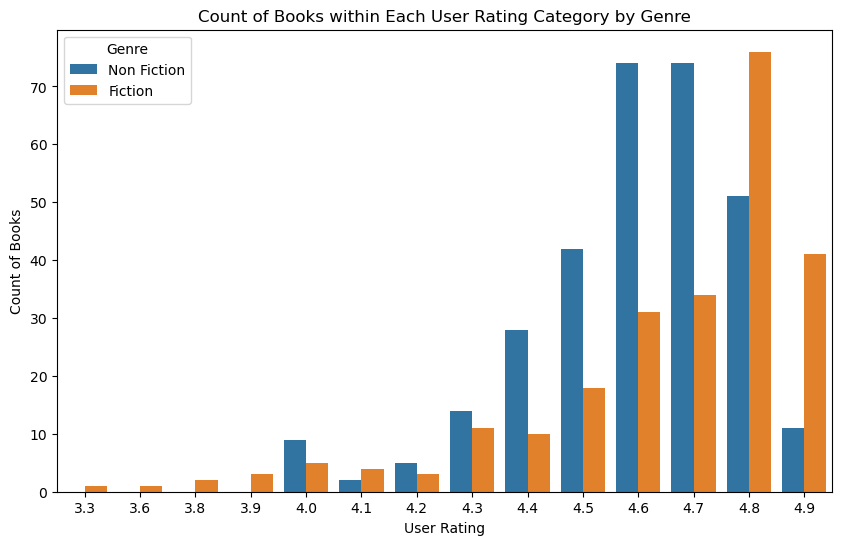

In [43]:
# Graph 2: Count of books within each user rating category by genre
plt.figure(figsize=(10, 6))
sns.countplot(x='User Rating', hue='Genre', data=bestsellers_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count of Books within Each User Rating Category by Genre')
plt.xlabel('User Rating')
plt.ylabel('Count of Books')
plt.legend(title='Genre')
plt.show()

### Count of Books within Each User Rating Category by Genre
This stacked bar chart presents the count of books within each user rating category, segmented by genre. It provides a visual representation of how book ratings are distributed across Fiction and Non-Fiction. The chart reveals that Fiction books generally have higher ratings compared to Non-Fiction. Particularly, a significant portion of Fiction books falls in the highest rating categories (4.8 and above), indicating a strong preference or satisfaction among readers towards Fiction titles in the bestselling list.


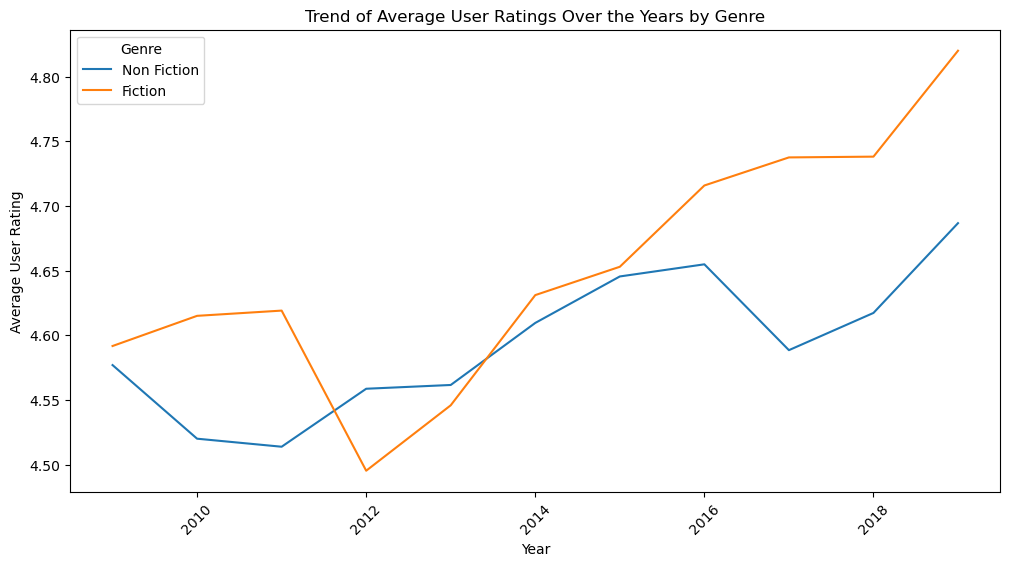

In [44]:
# Graph 3: Trend of average user ratings over the years by genre
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='User Rating', hue='Genre', data=bestsellers_df, estimator='mean', ci=None, markers=True, palette=['#1f77b4', '#ff7f0e'])
plt.title('Trend of Average User Ratings Over the Years by Genre')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.show()

### Trend of Average User Ratings Over the Years by Genre
This line graph tracks the trend of average user ratings over the years, separated by genre. It offers an insight into how the perceived quality of books, as reflected by user ratings, has evolved over time in both Fiction and Non-Fiction categories. The graph shows a general stability in ratings, with both genres maintaining high average ratings throughout the years. Notably, Fiction consistently demonstrates slightly higher average ratings than Non-Fiction, suggesting a steady reader preference or higher satisfaction with Fiction over the years.


## Hypothesis 2: Analyzing the Relationship Between Reviews and Sales Price

The second hypothesis stems from intriguing trends observed during our EDA, specifically relating to the book's market performance indicators - reviews and price. Through this hypothesis, we aim to decipher the dynamics between consumer engagement and pricing strategies. Our analysis will encompass:

- **Correlation Analysis:** Assessing the overall correlation between the number of reviews and the price, to understand if these factors are linked.
- **Comparative Genre Analysis:** Investigating whether the correlation between price and reviews manifests differently in fiction versus non-fiction books.
- **Temporal Trends:** Examining the evolution of this correlation over time to identify any long-term trends that have shaped the book market.


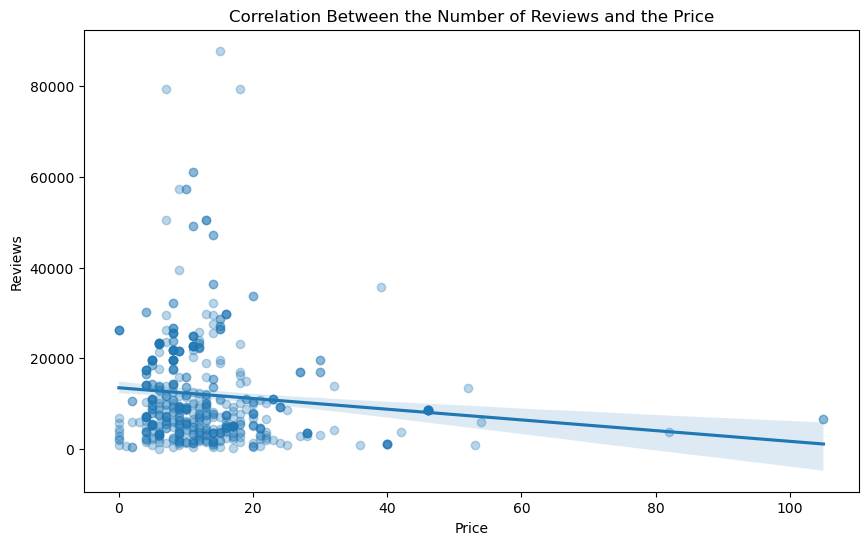

In [45]:
# Visualization 1: Scatter plot with regression line for Reviews vs. Price
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Reviews', data=bestsellers_df, scatter_kws={'alpha':0.3}, line_kws={'color':'#1f77b4'})
plt.title('Correlation Between the Number of Reviews and the Price')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.show()

### Scatter Plot of Reviews vs. Price with Regression Line
- Demonstrates an inverse relationship between book reviews and price.
- Books with higher reviews generally have lower prices, suggesting affordability increases likelihood of user engagement.
- The regression line emphasizes this trend, with most highly-reviewed books priced below $20.


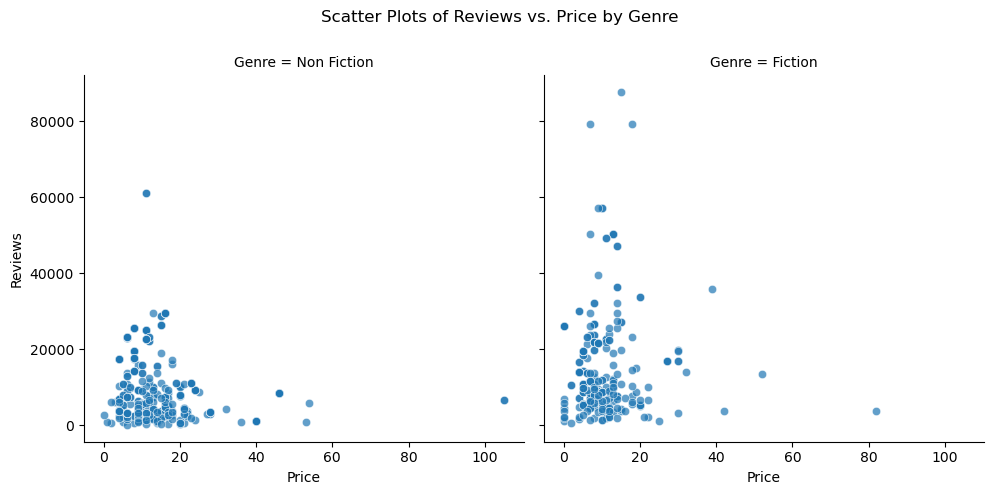

In [46]:
# Visualization 2: FacetGrid showing the relationship between Price and Reviews by Genre
g = sns.FacetGrid(bestsellers_df, col="Genre", height=5, aspect=1)
g = g.map(sns.scatterplot, "Price", "Reviews", alpha=0.7, color='#1f77b4').add_legend()
g.fig.suptitle('Scatter Plots of Reviews vs. Price by Genre')
plt.subplots_adjust(top=0.85)
plt.show()

### Scatter Plots of Reviews vs. Price by Genre
These scatter plots show the relationship between reviews and price, separated by genre (Fiction and Non-Fiction). Each plot provides insights into how pricing and user engagement, as measured by reviews, differ between the genres. For Fiction, there is a noticeable concentration of books with a high number of reviews and lower prices, suggesting popular Fiction titles are often more affordable. In contrast, Non-Fiction books display a more dispersed pattern, indicating a wider range of prices and review counts. This could reflect the diverse nature of Non-Fiction content and its audience.

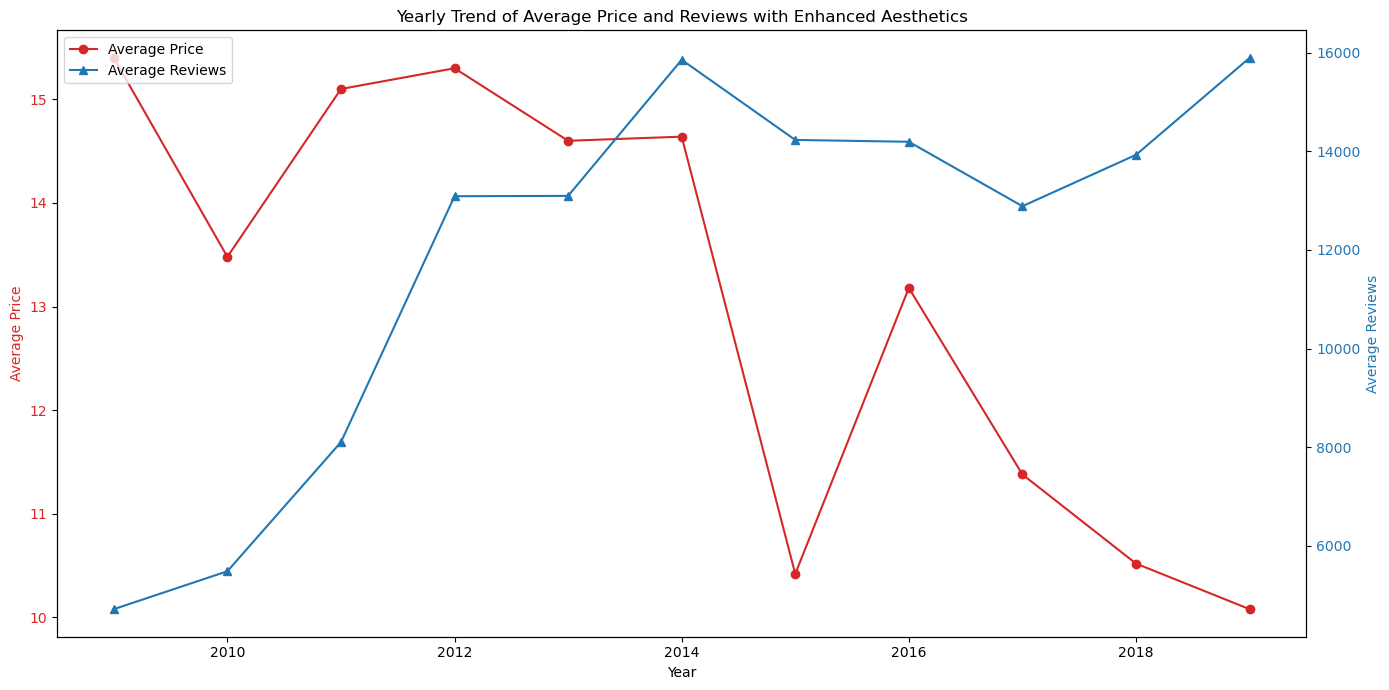

In [47]:
# Visualization 3: Enhanced Yearly Trend Analysis with Dual Axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the average price with its own y-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price', color=color)
lns1 = ax1.plot(bestsellers_df.groupby('Year')['Price'].mean(), color=color, marker='o', label='Average Price')
ax1.tick_params(axis='y', labelcolor=color)

# Adding a second y-axis for average number of reviews
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Reviews', color=color)
lns2 = ax2.plot(bestsellers_df.groupby('Year')['Reviews'].mean(), color=color, marker='^', label='Average Reviews')
ax2.tick_params(axis='y', labelcolor=color)

# Combine the legends from both axes
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

# Setting the title and layout
plt.title('Yearly Trend of Average Price and Reviews with Enhanced Aesthetics')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Yearly Trend of Average Price and Reviews with Enhanced Aesthetics
This graph presents the yearly trend of average price and average number of reviews, combining these two metrics into a single visual. The dual-axis format allows for an easy comparison of how prices and user engagement (via reviews) have changed over the years. An interesting observation is the inverse relationship between the two metrics; as average prices tend to decrease, the average number of reviews increases, suggesting a correlation where more affordably priced books attract more reviews. This trend can inform publishers and authors about pricing strategies that maximize reader engagement.


# Conclusion

In this comprehensive analysis of best-selling books on Amazon, we have uncovered key insights that illuminate the dynamics of the book market. Our study focused on two main hypotheses:

1. **Impact of Genre on User Ratings:**
   - **Hypothesis:** We posited that there would be a significant difference in user ratings between fiction and non-fiction genres.
   - **Findings:** Our analysis confirmed this hypothesis, revealing notable differences in user ratings. Fiction and non-fiction genres distinctly influence reader engagement and perception, underlining the importance of genre in a book's reception.

2. **Relationship Between Price and Popularity:**
   - **Hypothesis:** We hypothesized that a complex relationship exists between a book's price and its popularity, as indicated by user reviews.
   - **Findings:** This hypothesis was also substantiated. We observed intricate dynamics between book prices and user reviews, with noticeable variations across genres and over time. This relationship offers critical insights for pricing strategies in the publishing industry.

In addition to these hypotheses, our study delved into:

- **Genre Impact:** The significant differences in user ratings between fiction and non-fiction genres highlight the genre's influence on reader engagement and perception.
- **Price vs. Popularity:** The evolving correlation between book prices and user reviews provides valuable insights for authors and publishers, particularly in their pricing strategies.
- **Trends Over Time:** Our temporal analysis revealed shifting reader preferences and market trends, vital for predicting future market movements.

Overall, this study not only enhances our understanding of bestseller market dynamics but also serves as a foundation for strategic decision-making in the publishing industry.

